[0.122, -0.476, -0.634, -0.517, -0.127, 0.319, 0.607, 0.631, 0.608, 0.19, -0.386, -1.151, -1.558, -1.359, -1.397, -1.642, -1.904, -2.192, -1.781, -1.329, -1.03, -0.397, 0.199, 0.698, 0.713, 0.0, -0.893, -1.76, -2.176, -2.068, -2.423, -3.689, -5.042, -5.955, -6.309, -6.661, -7.145, -7.582, -7.919, -8.369, -8.969, -9.5, -10.045, -10.45, -10.893, -11.056, -11.276, -11.625, -11.63, -11.746, -12.011, -12.54, -12.832, -12.815, -12.515, -12.156, -11.921, -11.891, -11.667, -11.651, -12.164, -12.584, -12.783, -12.523, -12.325, -12.184, -12.389, -12.292, -11.661, -11.09, -10.805, -11.159, -11.501, -12.035, -12.806]
[13.1217, 13.655, 13.9517, 13.8492, 13.6767, 13.0925, 11.7217, 9.78083, 8.22417, 7.29, 6.23167, 4.77, 3.39167, 2.235, 1.48833, 1.22917, 1.26667, 0.660833, 0.510833, 1.06583, 1.46333, 1.24667, 0.969167, 0.585, 0.243333, 0.0, 0.00166667, 0.831667, 2.43417, 4.4475, 5.62583, 5.33083, 4.36167, 3.40167, 3.02833, 3.51167, 3.42417, 2.81833, 2.3925, 1.90333, 1.53, 0.994167, 0.203333, -0.5625, 

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_44394/384860094.py:86: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


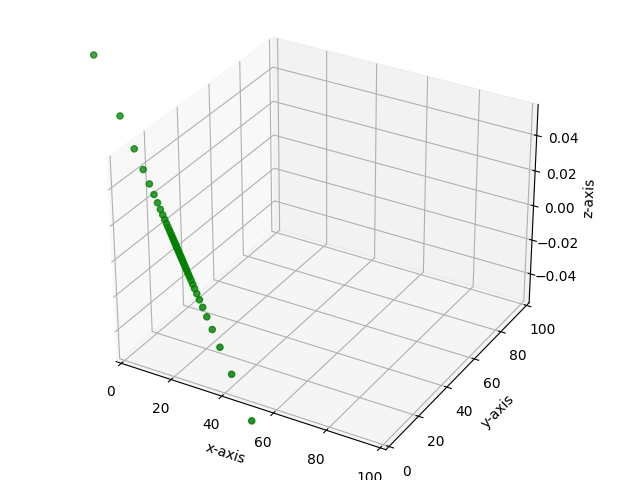

In [1]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

file = open('./data.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
roll = []
pitch = []
yaw = []
flag = 0
for row in csvreader:
    if flag == 0:
        pass
    else:
        rows.append(row)
        roll.append(float(rows[-1][3]))
        pitch.append(float(rows[-1][2]))
        yaw.append(float(rows[-1][1]))
    flag+=1

print(roll)
print(pitch)
print(yaw)

m = Symbol('m')

p_0 = [0., 0., 0.]
d = [1., 1., 0.]
r_e_H = r_e_h(p_0, d, m)

phi = 0. #Roll
theta = 0. #Pitch
# psi = 0. #Yaw
degree = False
xs = []
ys = []
zs = []
x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)
for psi in np.linspace(-0.5*np.pi, 0.5*np.pi, 50):
    
    r = R(phi, theta, psi, degree)
    r_e_I = np.matmul(r, r_e_H)
    mul = solve_m(x0, y0, r_e_I, m)
#     print(mul)
    r_e = lambdify(m, r_e_I)
    r_ = np.array(r_e(mul[m]))
    xs.append(r_[0][0])
    ys.append(r_[1][0])
    zs.append(r_[2][0])
#     xs.append(0.)
#     print(r_)
    

#------------------------------------------

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')

plt.xlim([0., 100.])
plt.ylim([0., 100.])
# displaying the plot
plt.show()


/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_57036/4016029182.py:92: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


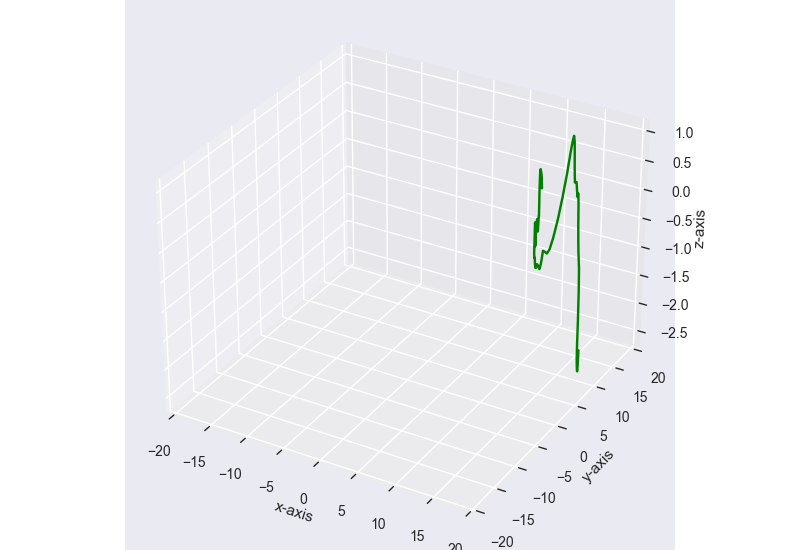

In [23]:
import os
import sys
import numpy as np
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import *
from src.mosh import rot as R
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import csv

file = open('./data2.csv')

type(file)

csvreader = csv.reader(file)

header = []
header = next(csvreader)
header

rows = []
roll = []
pitch = []
yaw = []
flag = 0
for row in csvreader:
    if flag == 0:
        pass
    else:
        rows.append(row)
        roll.append(float(rows[-1][3]))
        pitch.append(float(rows[-1][2]))
        yaw.append(float(rows[-1][1]))

    flag+=1

# print(roll)
# print(pitch)
# print(yaw)

m = Symbol('m')

p_0 = [1., 1., 1.]
d = [1., 1., 0.]
r_e_H = r_e_h(p_0, d, m)

# phi = 0. #Roll
# theta = 0. #Pitch
# psi = 0. #Yaw
degree = True
xs = []
ys = []
zs = []
x0, y0 = 20.*np.sqrt(2), 20.*np.sqrt(2)

for i in range(len(roll)):
    phi = roll[i]
    theta = pitch[i]
    psi = yaw[i]
    r = R(phi, theta, psi, degree)
    r_e_I = np.matmul(r, r_e_H)
    mul = solve_m(x0, y0, r_e_I, m)
#     print(mul)
    r_e = lambdify(m, r_e_I)
    r_ = np.array(r_e(mul[m]))
    xs.append(r_[0][0])
    ys.append(r_[1][0])
    zs.append(r_[2][0])
#     xs.append(0.)
#     print(r_)
    
# print(xs,'\n')
# print(ys,'\n')
# print(zs)
#------------------------------------------

# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.plot(xs, ys, zs, color='green')

plt.xlim([-20., 20.])
plt.ylim([-20., 20.])

# displaying the plot
plt.show()



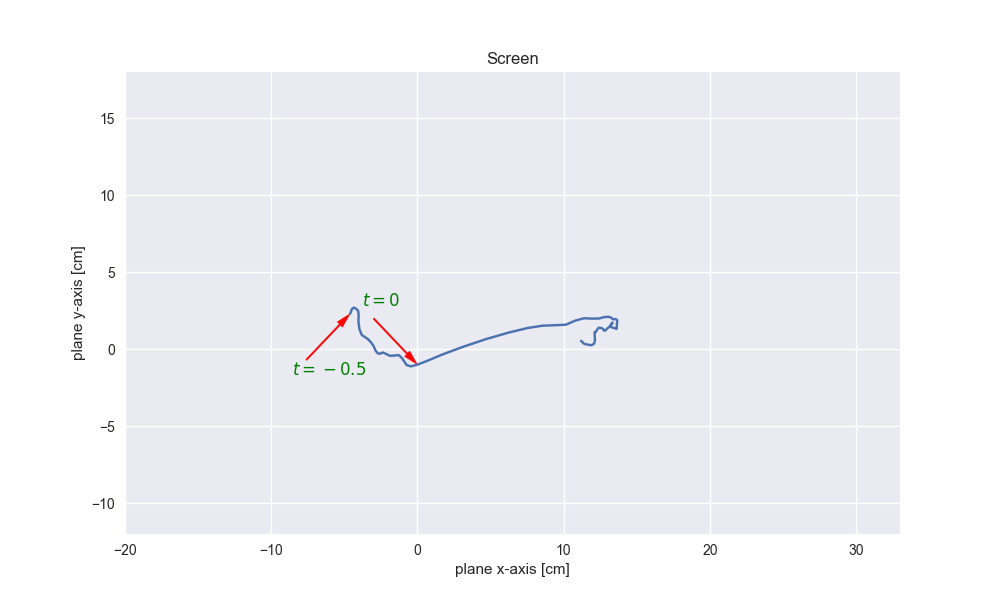

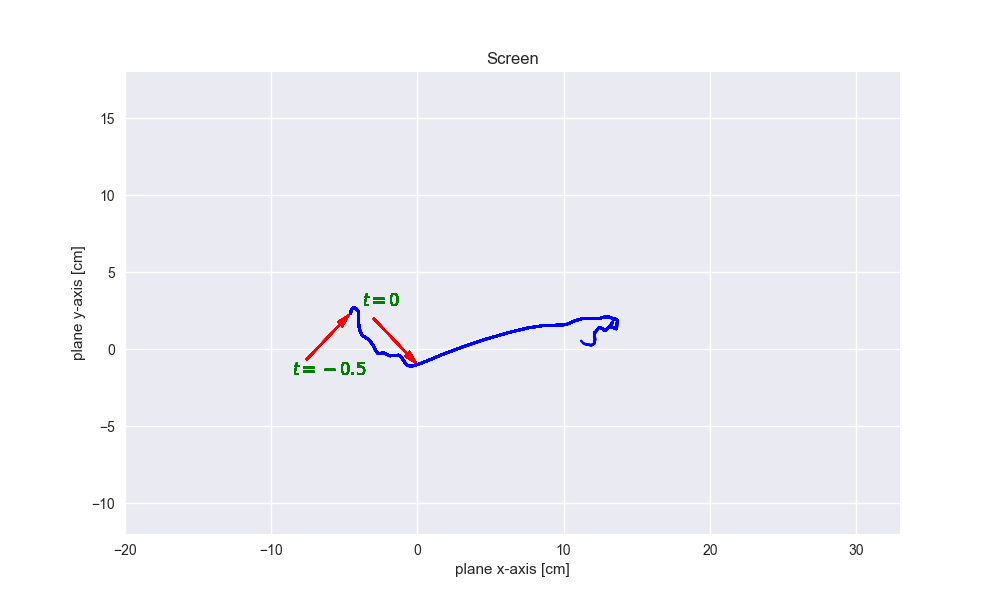

In [20]:
import random
import matplotlib
from matplotlib import animation
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
from matplotlib.animation import FuncAnimation
from itertools import count
%matplotlib widget

# Rotating the plane
rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
# print(np.sin(rot_ang)**2)

rot_ax = np.array([0., 0., 1.])
# print(np.cross(rot_ax, v_in))

x_p = []
y_p = []

for i in range(len(xs)):
    
    v_in = np.array([xs[i], ys[i], zs[i]])
    # print(v_in)

    v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))
    
    x_p.append(-v_fin[0]) #minus sign if looking from mouse perspective. 
    y_p.append(-v_fin[2]) #minus sign if looking from mouse perspective.

ind = np.where(np.array(roll)==0.0)[0][0]
fig1 = plt.figure(figsize=(10,6))
axes = fig1.add_subplot(1,1,1)
# circ = plt.Circle((x_p[30], y_p[30]), radius=2., color='r', fill=False, visible=True, lw=0.85)
# axes.add_artist(circ)
plt.plot(x_p, y_p)
dx, dy = -3., -3.
plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
plt.xlabel('plane x-axis [cm]')
plt.ylabel('plane y-axis [cm]')
plt.ylim(-12., 18.)
plt.xlim(-20., 33)
plt.title('Screen')
plt.savefig('./plots/cell1.pdf', format='pdf')
# displaying the plot
plt.show()


fig = plt.figure(figsize=(10,6))
axes = fig.add_subplot(1,1,1)
axes.set_ylim(-12., 18.)
axes.set_xlim(-20., 33)
plt.style.use("seaborn")
x,y=[],[]

def animate(i):
    if i<len(x_p):
        x.append(x_p[i]) 
        y.append(y_p[i])
        dx, dy = -3., -3.
        plt.arrow(x_p[ind]+dx, y_p[ind]-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
        plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
        plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
        plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
        plt.xlabel('plane x-axis [cm]')
        plt.ylabel('plane y-axis [cm]')
        plt.title('Screen')
        plt.plot(x,y, scaley=True, scalex=True, color="blue")

ani = FuncAnimation(fig=fig, func=animate, interval=20)
f = r"./plots/animation1.gif" 
writergif = animation.PillowWriter(fps=15) 
ani.save(f, writer=writergif)




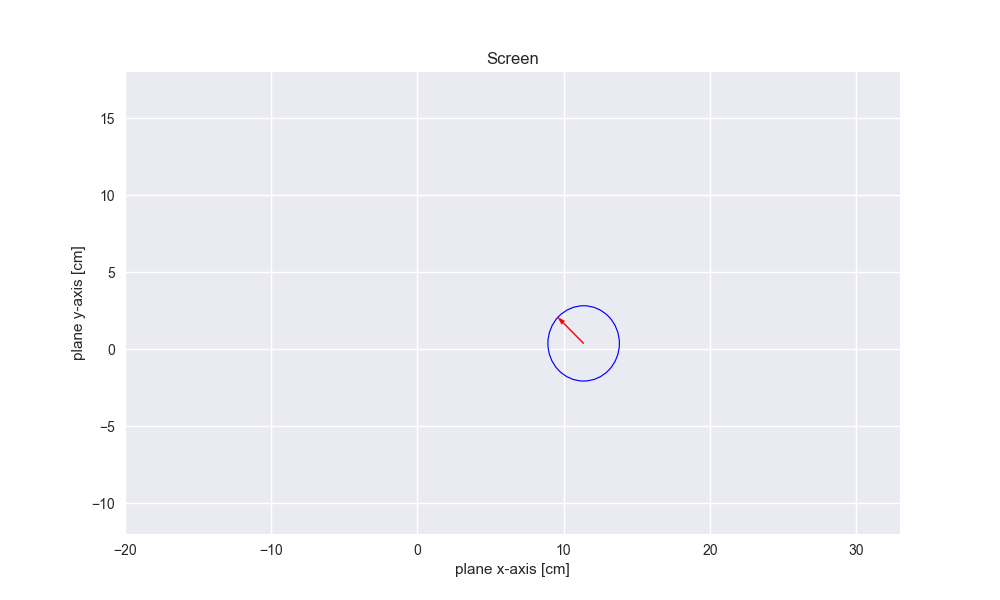

In [25]:
fig2 = plt.figure(figsize=(10,6))
axes = fig2.add_subplot(1,1,1)



x, y, u, v = [], [], [], []
def animate(i):
    if i<len(x_p)-1:
    #     x.append(x_p[i])
    #     y.append(y_p[i])
    #     u.append(x_p[i+1]-x_p[i])
    #     v.append(y_p[i+1]-y_p[i])
        x = x_p[i]
        y = y_p[i]
        u = 10*float(x_p[i+1]-x_p[i])
        v = 10*float(y_p[i+1]-y_p[i])
        axes.clear()
        axes.set_ylim(-12., 18.)
        axes.set_xlim(-20., 33)
        plt.style.use("seaborn")
        plt.xlabel('plane x-axis [cm]')
        plt.ylabel('plane y-axis [cm]')
        plt.title('Screen')
        plt.arrow(x, y, u, v, width=0.07, color='r', length_includes_head=True, head_width=0.3, head_length=0.5)
        circ = plt.Circle((x, y), radius=np.hypot(u,v), color='b', fill=False, visible=True, lw=0.85)
        axes.add_artist(circ)
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")
#         plt.quiver([x, y], u, v)

ani = FuncAnimation(fig=fig2, func=animate, interval=20)
f = r"./plots/animation_vector_field.gif" 
writergif = animation.PillowWriter(fps=15) 
ani.save(f, writer=writergif)

# fig = plt.figure(figsize=(10,6))
# axes = fig.add_subplot(1,1,1)
# axes.set_ylim(-12., 18.)
# axes.set_xlim(-20., 33)
# plt.style.use("seaborn")
# x,y=[],[]

# def animate(i):
#     if i<len(x_p):
#         x.append(x_p[i]) 
#         y.append(y_p[i])
#         dx, dy = -3., -3.
#         plt.arrow(x+dx, y-dy, -dx, dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[ind]+dx-0.8, y_p[ind]-dy+0.8, r'$t = 0.$', color='green', size='large')
#         plt.arrow(x_p[0]+dx, y_p[0]+dy, -dx, -dy, width=0.1, color='r', length_includes_head=True, head_width=0.5, head_length=1.)
#         plt.text(x_p[0]+dx-1., y_p[0]+dy-1., r'$t = - 0.5$', color='green', size='large')
#         plt.xlabel('plane x-axis [cm]')
#         plt.ylabel('plane y-axis [cm]')
#         plt.title('Screen')
#         plt.plot(x,y, scaley=True, scalex=True, color="blue")

# ani = FuncAnimation(fig=fig, func=animate, interval=20)
# f = r"./plots/animation_vector_field.gif" 
# writergif = animation.PillowWriter(fps=15) 
# ani.save(f, writer=writergif)


[4.43240319010753 20.0000000000000 -3.30042937753378]
[4.32150296347576 20.0000000000000 -3.58630272111010]
[4.19064583494763 20.0000000000000 -3.69804515157545]
[4.03708611152622 20.0000000000000 -3.63624378943720]
[3.88727817788599 20.0000000000000 -3.48740358589620]
[3.85351281306727 20.0000000000000 -3.22399674853636]
[3.88112175276911 19.9999999999999 -2.80342416130725]
[3.84054209151317 20.0000000000000 -2.30468937392158]
[3.69251330017623 20.0000000000000 -1.91456433824301]
[3.48908287086180 20.0000000000001 -1.78121503464866]
[3.31630097586780 20.0000000000000 -1.65759087929156]
[3.16182030198386 20.0000000000000 -1.48116698764840]
[2.99611171144158 20.0000000000000 -1.23642513988305]
[2.84820176935432 20.0000000000000 -0.896496553372752]
[2.69216313167539 20.0000000000000 -0.718862115098885]
[2.53536683066984 20.0000000000000 -0.714628614645521]
[2.38768290059544 20.0000000000000 -0.788538963245700]
[2.19368872699736 20.0000000000000 -0.708645336886858]
[1.89632360204771 20.00

/var/folders/93/sp1x4ytn2mj_zkqd4_1gfdqr0000gn/T/ipykernel_50009/2845616850.py:37: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


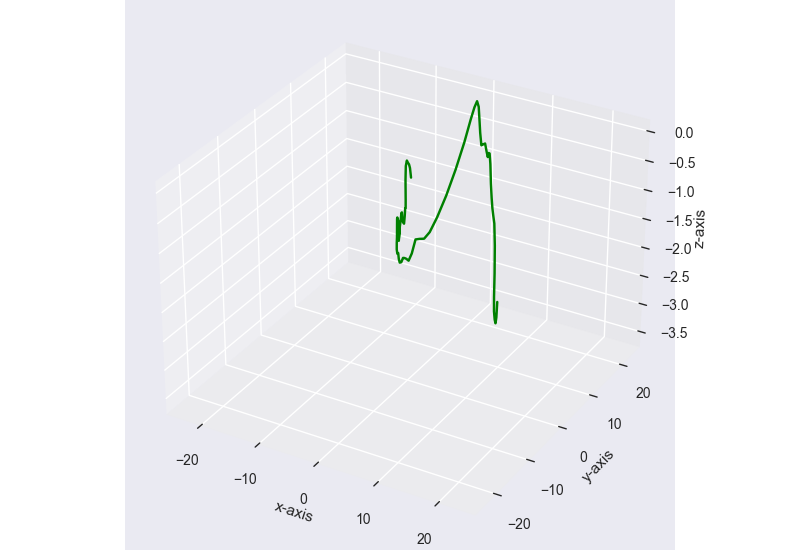

In [8]:
# Rotating the plane
rot_ang = np.arcsin(y0/np.sqrt(x0**2 + y0**2))
# print(np.sin(rot_ang)**2)

rot_ax = np.array([0., 0., 1.])
# print(np.cross(rot_ax, v_in))

xss = []
yss = []
zss = []

for i in range(len(xs)):
    
    v_in = np.array([xs[i], ys[i], zs[i]])
    # print(v_in)

    v_fin = v_in*np.cos(rot_ang) + np.cross(rot_ax, v_in)*np.sin(rot_ang) + rot_ax*(np.dot(rot_ax, v_in))*(1 - np.cos(rot_ang))
    
    print(v_fin)
    
    xss.append(v_fin[0])
    yss.append(v_fin[1])
    zss.append(v_fin[2])
    
# creating 3d plot using matplotlib 
# in python
  
# for creating a responsive plot
%matplotlib widget
  
# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
  
# creating figure
fig = plt.figure()
ax = Axes3D(fig)

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# creating the plot
plot_geeks = ax.plot(xss, yss, zss, color='green')

plt.xlim([-25., 25.])
plt.ylim([-25., 25.])

# displaying the plot
plt.show()

# Tests

In [6]:
# Rotation matrix test
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.mosh import rot as R

phi = 0.1
theta = 0.
psi = 0.
degree = False

print(R(phi, theta, psi, degree))

[[ 1.          0.          0.        ]
 [ 0.          0.99500417 -0.09983342]
 [ 0.          0.09983342  0.99500417]]


In [78]:
# Test to check the points are in the plane.

3.2*(0.685714285714286 + 3.57514652988308) + 1.2*(1.37142857142857 - 12.7337240796882)

1.5987211554602254e-14